Question 0:

1. A model is linear if the relationship between the independent variable(s) and the dependent variable is represented by a straight line. Linear models are linear in their coefficients, meaning they remain in simple forms and are not involved in more complex functions, just addition and multiplication of constants. 
2. If you include an intercept in your model, the dummy/one-hot encoded variable’s coefficient represents the difference in the outcome between the category that the dummy variable represents and the reference category (the one not represented by the dummy variable), and the intercept represents the average outcome for the reference category alone. If you do not include an intercept, the coefficient for the dummy variable simply represents the mean outcome for that specific category, without reference to a baseline category, just a direct comparison.
3. Linear regression is typically used to predict continuous values, not discrete classifications or categories. Linear regression can predict any number, not just probabilities between 0 and 1. In instances where the variables are binary, getting predicted values like -2 or 1.4 wouldn’t make sense for a yes/no question. Additionally, the assumptions for linear regression assume that error is spread evenly and that the data follows a normal distribution which is not always the case in classification. 
4. High accuracy on the training data and low accuracy on the test data is a sign of overfitting, which is what happens when the model memorizes the training data instead of learning the patterns themselves. It works well on the training set because it has seen all of the details, but cannot perform well on unseen data because it doesn’t have the ability to generalize, usually due to the model being too complex or too noisy.
5. First way is to use a model designed to capture non-linear relationships without feature transformations. Decision trees, like the one used on the reference page are a perfect example of a model that splits the data based on its features to create branches that effectively capture nonlinear trends.
Second way is to use feature engineering to capture nonlinear relationships. We can do this through polynomial features by adding higher-degree powers of the features to the model, eg. squared, cubic, etc. This will allow the model to capture curves or nonlinear patterns in the data, using the data given to us in the original features. 
6. The interpretation of the intercept in linear regression is the predicted value of the target variable (y) when the predictor variable(s) (x) are 0. This interpretation may or may not make sense depending on the context of the data. The slope coefficient for a variable represents how much the target variable changes when the predictor variable increases by 1 unit, with all other predictor variables being held constant. The coefficient for a dummy/one-hot encoded variable depends on the presence of an intercept. With an intercept the coefficient tells you the difference between that category and the other or reference category, without an intercept, the coefficient gives you the direct average for that category.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Question 1: 

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")
data.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [4]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood', 'Property Type',
       'Room Type'],
      dtype='object')


In [5]:
neighborhood_avg = data.groupby('Neighbourhood').agg(
    avg_price=('Price', 'mean'),
    avg_score=('Review Scores Rating', 'mean')
).sort_values(by='avg_price', ascending=False)

print(neighborhood_avg.head())


                avg_price  avg_score
Neighbourhood                       
Manhattan      183.664286  91.801496
Staten Island  146.166667  90.843750
Brooklyn       127.747378  92.363497
Queens          96.857233  91.549057
Bronx           75.276498  91.654378


1. Manhattan is the most expensive borough on average. 

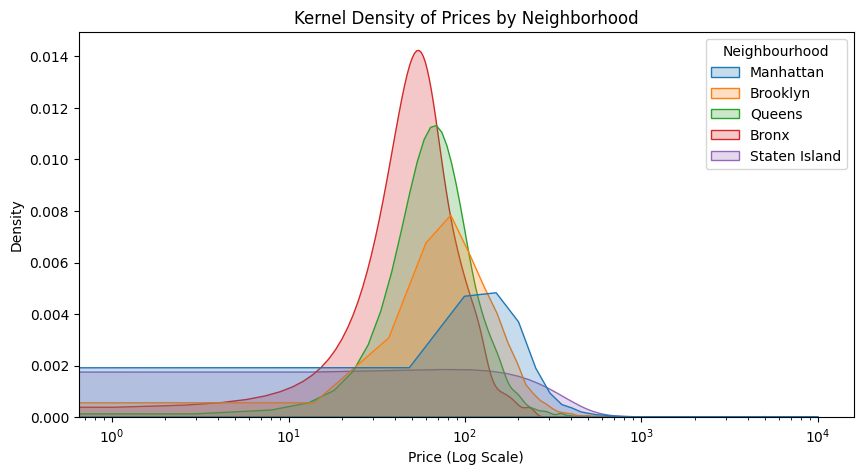

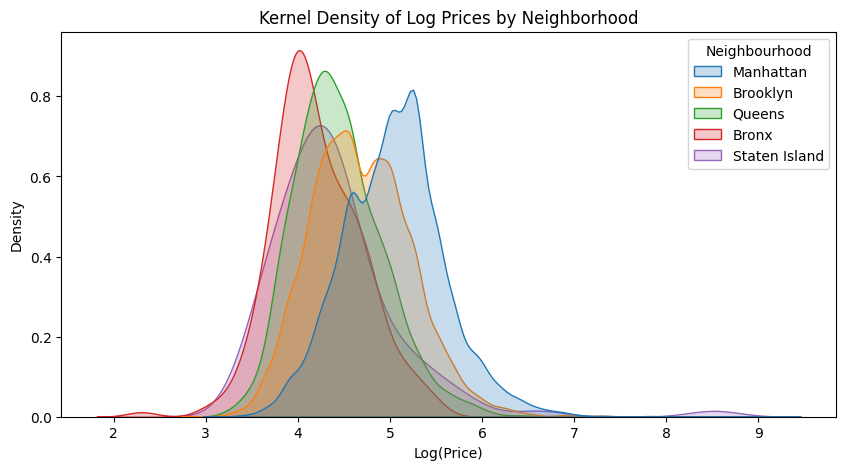

In [6]:
# Plot Kernel Density of Price (Log Scale)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='Price', hue='Neighbourhood', common_norm=False, fill=True)
plt.xscale('log')  # Log scale for better visualization
plt.title("Kernel Density of Prices by Neighborhood")
plt.xlabel("Price (Log Scale)")
plt.ylabel("Density")
plt.show()

# Plot Kernel Density of Log Price
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x=np.log(data['Price']), hue='Neighbourhood', common_norm=False, fill=True)
plt.title("Kernel Density of Log Prices by Neighborhood")
plt.xlabel("Log(Price)")
plt.ylabel("Density")
plt.show()

In [7]:
# Remove the target variable from the features
features = data.drop(columns=['Price'])

# One-hot encode 'Neighbourhood' column
neigh_data = pd.get_dummies(features['Neighbourhood'], drop_first=False)

# Define target variable
y = data['Price']

# Fit the model without an intercept
model_no_int = LinearRegression(fit_intercept=False)
model_no_int.fit(neigh_data, y)

# Get coefficients and create a DataFrame
coeffs = model_no_int.coef_
coeffs_df = pd.DataFrame(coeffs, index=neigh_data.columns, columns=['Coefficient'])

print(coeffs_df)

               Coefficient
Bronx            75.276498
Brooklyn        127.747378
Manhattan       183.664286
Queens           96.857233
Staten Island   146.166667


In [8]:
avg_neighborhood = data.groupby('Neighbourhood')['Price'].mean()
print(avg_neighborhood)

Neighbourhood
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64


2. Each coefficient in the regression matches the mean price of that neighborhood. This happens because we removed the intercept, so the model treats each neighborhood as its own separate baseline. In a regression without an intercept, the coefficient for each Neighborhood represents the average price in that neighborhood. This confirms that regressing a continuous variable (Price) on a categorical variable (Neighborhood) without an intercept reproduces group means.

In [9]:
# One-hot encode only the 'Neighbourhood ' column, dropping the first category to set a reference group
neigh_data = pd.get_dummies(features['Neighbourhood'], drop_first=True)

# Fit the model with an intercept (default behavior)
model_with_int = LinearRegression(fit_intercept=True)
model_with_int.fit(neigh_data, y)

# Get coefficients and intercept
coeffs = model_with_int.coef_
intercept = model_with_int.intercept_

# Create a DataFrame for the coefficients
coeffs_df = pd.DataFrame(coeffs, index=neigh_data.columns, columns=['Coefficient'])

print("Intercept:", intercept)
print(coeffs_df)





Intercept: 75.2764976958471
               Coefficient
Brooklyn         52.470881
Manhattan       108.387789
Queens           21.580735
Staten Island    70.890169


1. When you include an intercept in your model, you must drop one dummy variable (using drop_first=True) to avoid perfect multicollinearity. The intercept then represents the mean Price for the reference neighborhood (the dropped category), and each coefficient shows the difference in Price relative to that reference. To recover the no-intercept model's coefficients (which are the mean Prices for each neighborhood), you just add the intercept to each coefficient from the intercept model. For the reference group, the no-intercept coefficient equals the intercept.

4. 

In [11]:
# 80/20 split
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Create dummy variables for Neighborhood
train_neigh = pd.get_dummies(train['Neighbourhood'], drop_first=True)
test_neigh = pd.get_dummies(test['Neighbourhood'], drop_first=True)

# combine Review Scores Rating and neighborhood dummies
X_train = pd.concat([train[['Review Scores Rating']], train_neigh], axis=1)
X_test = pd.concat([test[['Review Scores Rating']], test_neigh], axis=1)
y_train = train['Price']
y_test = test['Price']

# fit linear regression w/ int
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# pull out coefficient
coef_rating = model.coef_[X_train.columns.get_loc('Review Scores Rating')]

print("Test R²:", r2)
print("Test RMSE:", rmse)
print("Coefficient on Review Scores Rating:", coef_rating)

# Group by Property Type and compute the mean Price to find the most expensive property type
property_mean = data.groupby('Property Type')['Price'].mean().sort_values(ascending=False)
most_expensive = property_mean.idxmax()
print("Most expensive property type:", most_expensive)
print("Average Price for that property type:", property_mean.loc[most_expensive])

Test R²: 0.04592588381735141
Test RMSE: 140.9182110372934
Coefficient on Review Scores Rating: 1.2118517840631857
Most expensive property type: Condominium
Average Price for that property type: 241.22916666666666


5. 

In [12]:
# 80/20 split
train, test = train_test_split(data, test_size=0.2, random_state=42)

# create dummy variables for both categorical features 
train_neigh = pd.get_dummies(train['Neighbourhood'], drop_first=True)
test_neigh = pd.get_dummies(test['Neighbourhood'], drop_first=True).reindex(columns=train_neigh.columns, fill_value=0)

# For Property Type: drop the first category
train_prop = pd.get_dummies(train['Property Type'], drop_first=True)
test_prop = pd.get_dummies(test['Property Type'], drop_first=True).reindex(columns=train_prop.columns, fill_value=0)

# combine predictors
X_train = pd.concat([train[['Review Scores Rating']], train_neigh, train_prop], axis=1)
X_test  = pd.concat([test[['Review Scores Rating']], test_neigh, test_prop], axis=1)

# fit linear regression w/ int
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set and calculate r2 and rmse
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# pull out coefficient
coef_rating = model.coef_[X_train.columns.get_loc('Review Scores Rating')]

print("Test R²:", r2)
print("Test RMSE:", rmse)
print("Coefficient on Review Scores Rating:", coef_rating)

# identify most expensive property type
property_avg = data.groupby('Property Type')['Price'].mean().sort_values(ascending=False)
most_expensive = property_avg.idxmax()

print("\nMost expensive property type to rent:", most_expensive)
print("Average Price for that property type:", property_avg.loc[most_expensive])


Test R²: 0.05424271355124577
Test RMSE: 140.3026623827628
Coefficient on Review Scores Rating: 1.2010106602298058

Most expensive property type to rent: Condominium
Average Price for that property type: 241.22916666666666


6. When I added property type to the model, I controlled for its effect on Price. This means the coefficient on Review Scores Rating now represents the change in Price for a one‐unit increase in the review score while holding both neighborhood and property type constant. Therefore, if the coefficient on Review Scores Rating changes from part 4 to part 5, it shows that the relationship between review scores and Price was partly confounded by property type. 

Question 2:

In [13]:
cars = pd.read_csv('cars_hw.csv') # read in data
print(cars.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


1. 

In [14]:
cars = cars.dropna()
cars = cars[cars['Price'] < cars['Price'].quantile(0.99)] #removes outliers
cars['log_Price'] = np.log(cars['Price'] + 1) #adds a new column to normalize the price values

/tmp/ipykernel_39465/3017806611.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars['log_Price'], shade=True)


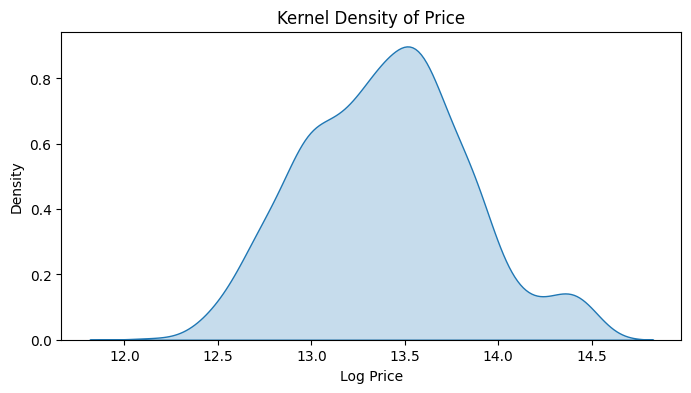

Summary of Price by Brand:
               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  279159.708519   248000.0   485000.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       27.0  1.830333e+06  110937.959100  1589000.0  1767000.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  216019.860943   237000.0   411000.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0  

In [15]:
#summarize price variable and create KDE
plt.figure(figsize=(8, 4)) 
sns.kdeplot(cars['log_Price'], shade=True)
plt.title('Kernel Density of Price')
plt.xlabel('Log Price')
plt.show()

#summarize prices by brand
brand_summary = cars.groupby('Make')['Price'].describe()
print("Summary of Price by Brand:")
print(brand_summary)


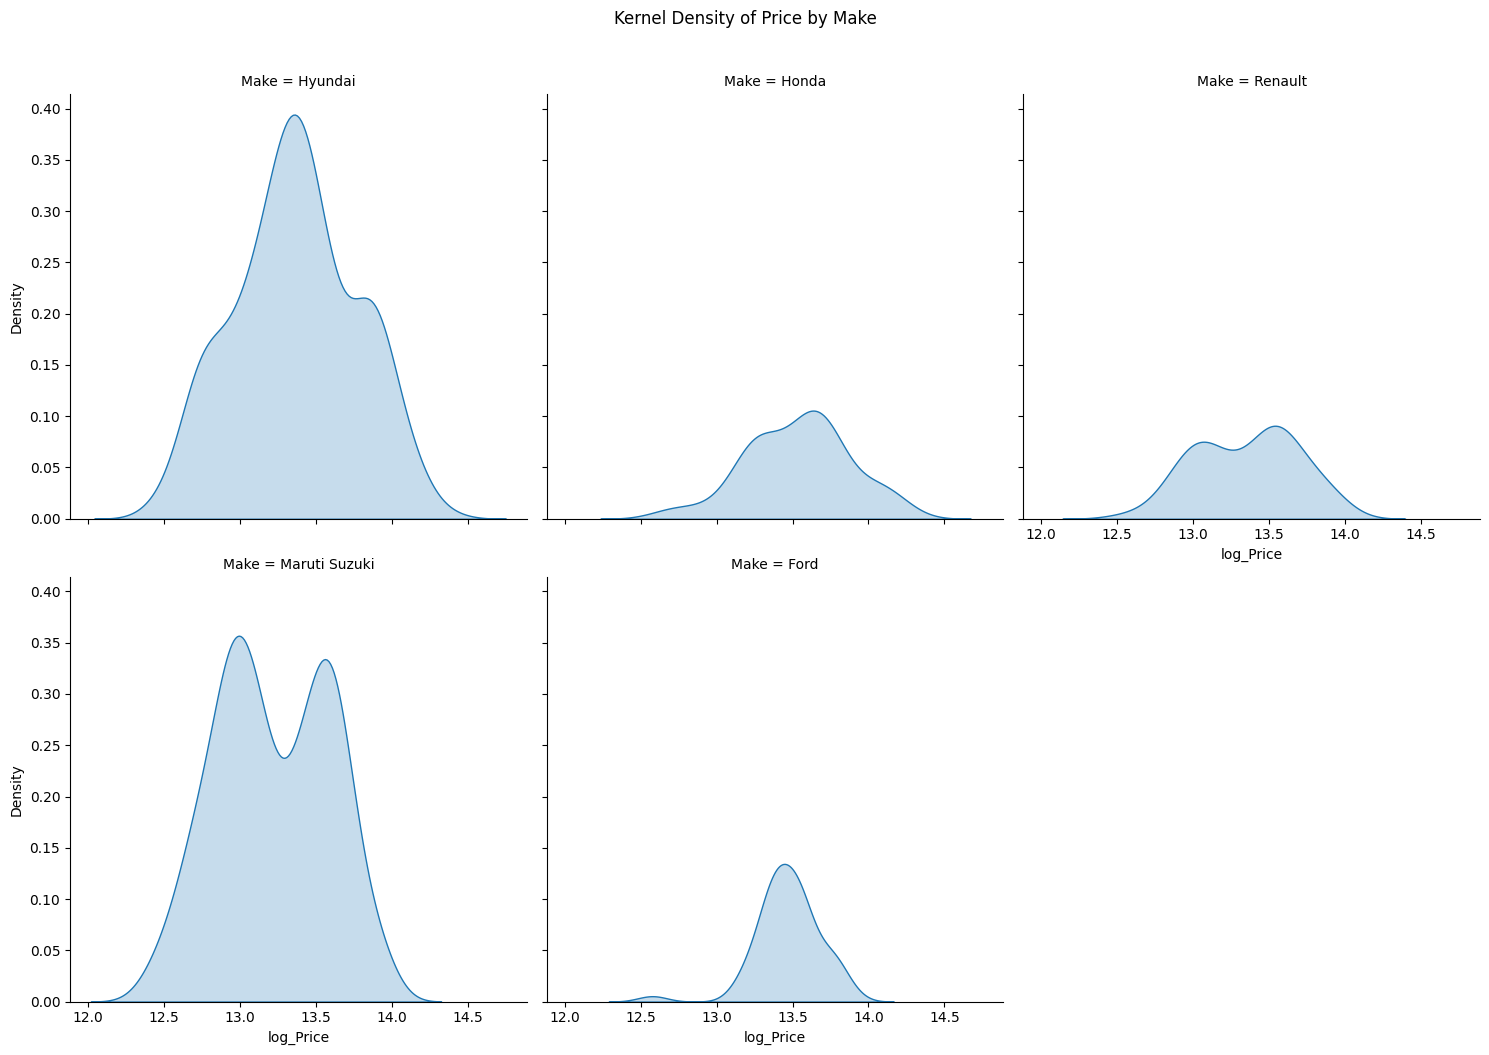

In [17]:
# grouped KDE of top 5 most frequent makes
top_brands = cars['Make'].value_counts().head(5).index
sns.displot(data=cars[cars['Make'].isin(top_brands)], x="log_Price", col="Make", col_wrap=3, kind="kde", fill=True)
plt.suptitle('Kernel Density of Price by Make', y=1.05)
plt.show()

In [23]:
brands_mean = cars.groupby('Make')['Price'].mean().sort_values(ascending=False)
print("Most expensive car brands(descending):")
print(brands_mean.head(5))

Most expensive car brands(descending):
Make
MG Motors    1.830333e+06
Kia          1.614750e+06
Jeep         1.499500e+06
Mahindra     1.100167e+06
Tata         1.007727e+06
Name: Price, dtype: float64


3. 

In [24]:
# 80/20 split
train, test = train_test_split(cars, test_size=0.2, random_state=42)

4. 

In [25]:
# first model
# Identify numeric predictor columns, take out price columns 
numeric_cols = cars.select_dtypes(include=[np.number]).columns.drop(['Price', 'log_Price'])
X_train_num = train[numeric_cols]
X_test_num  = test[numeric_cols]
y_train = train['Price']
y_test  = test['Price']

# fit the model
num_model = LinearRegression()
num_model.fit(X_train_num, y_train)
y_train_pred_num = num_model.predict(X_train_num)
y_test_pred_num = num_model.predict(X_test_num)

# find r2 and rmse
r2_train_num = r2_score(y_train, y_train_pred_num)
r2_test_num = r2_score(y_test, y_test_pred_num)
rmse_train_num = np.sqrt(mean_squared_error(y_train, y_train_pred_num))
rmse_test_num = np.sqrt(mean_squared_error(y_test, y_test_pred_num))
print(f"\nNumeric-Only Model:\nTraining R²: {r2_train_num:.3f}, RMSE: {rmse_train_num:.3f}\nTest R²: {r2_test_num:.3f}, RMSE: {rmse_test_num:.3f}")



Numeric-Only Model:
Training R²: 0.327, RMSE: 282434.558
Test R²: 0.247, RMSE: 281406.475


In [26]:
# 2nd model
# Regress Price on Categorical Variables Alone
categorical_cols = cars.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type',
       'Transmission', 'Transmission_Type'],
      dtype='object')


In [27]:
cat_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
train_cat = pd.get_dummies(train[cat_vars], drop_first=True)
test_cat = pd.get_dummies(test[cat_vars], drop_first=True)

In [34]:
cat_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
train_cat = pd.get_dummies(train[cat_vars], drop_first=True)
test_cat = pd.get_dummies(test[cat_vars], drop_first=True).reindex(columns=train_cat.columns, fill_value=0)

cat_model = LinearRegression()
cat_model.fit(train_cat, y_train)
y_test_pred_cat = cat_model.predict(test_cat)

r2_test_cat = r2_score(y_test, y_test_pred_cat)
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))

print("\nCategorical-Only Model")
print(f"Test R²: {r2_test_cat:.3f}, Test RMSE: {rmse_test_cat:.3f}")


Categorical-Only Model
Test R²: 0.604, Test RMSE: 203990.910


The Categorical-Only Model performs better on the test set.

In [35]:
# joint model
X_train_joint = pd.concat([X_train_num, train_cat], axis=1)
X_test_joint  = pd.concat([X_test_num, test_cat], axis=1)

joint_model = LinearRegression()
joint_model.fit(X_train_joint, y_train)
y_test_pred_joint = joint_model.predict(X_test_joint)

r2_test_joint = r2_score(y_test, y_test_pred_joint)
rmse_test_joint = np.sqrt(mean_squared_error(y_test, y_test_pred_joint))

print("\nJoint Model")
print("Test R²: {:.3f}, Test RMSE: {:.3f}".format(r2_test_joint, rmse_test_joint))
print("Improvement over best individual model: R² change = {:.3f}, RMSE change = {:.3f}"
      .format(r2_test_joint - max(r2_test_num, r2_test_cat), rmse_test_joint - min(rmse_test_num, rmse_test_cat)))


Joint Model
Test R²: 0.777, Test RMSE: 153048.312
Improvement over best individual model: R² change = 0.173, RMSE change = -50942.598


The joint model performs better than the numeric and categorical models.

6. 

In [47]:
# expand set of numerical vars w polynomial features
degrees = range(1, 17)
results = []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_test_pred_poly = poly_model.predict(X_test_poly)
    
    r2_poly = r2_score(y_test, y_test_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
    results.append((d, r2_poly, rmse_poly))
    print("Degree {}: Test R² = {:.3f}, RMSE = {:.3f}".format(d, r2_poly, rmse_poly))

Degree 1: Test R² = 0.247, RMSE = 281406.475
Degree 2: Test R² = 0.278, RMSE = 275565.721
Degree 3: Test R² = 0.280, RMSE = 275136.730
Degree 4: Test R² = 0.282, RMSE = 274739.805
Degree 5: Test R² = 0.252, RMSE = 280440.219
Degree 6: Test R² = 0.238, RMSE = 283066.292
Degree 7: Test R² = 0.089, RMSE = 309395.818
Degree 8: Test R² = 0.061, RMSE = 314097.509
Degree 9: Test R² = 0.029, RMSE = 319459.120
Degree 10: Test R² = 0.042, RMSE = 317268.024
Degree 11: Test R² = 0.038, RMSE = 318021.221
Degree 12: Test R² = 0.030, RMSE = 319307.901
Degree 13: Test R² = 0.021, RMSE = 320854.649
Degree 14: Test R² = 0.012, RMSE = 322228.487
Degree 15: Test R² = 0.005, RMSE = 323359.386
Degree 16: Test R² = -0.002, RMSE = 324473.046


R² went negative at degree 16. For the best model with expanded features (D=4), the R-squared value is 0.282 and the RMSE is 274739.805. This is significantly worse than the metrics from the joint model in question 4.

6. 

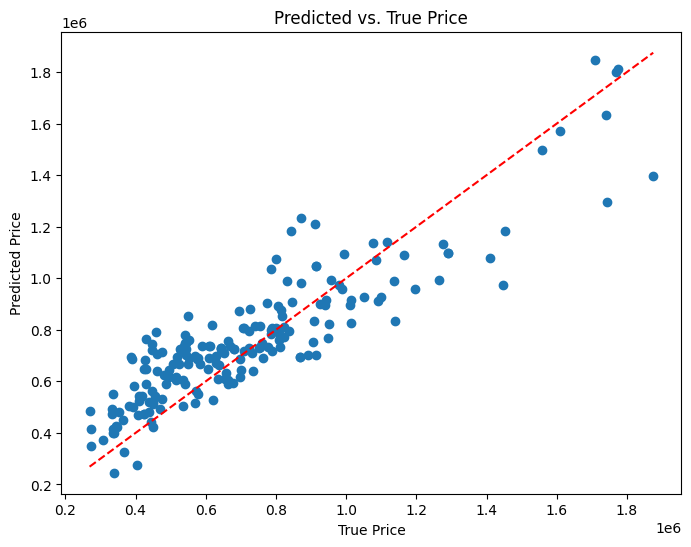

/tmp/ipykernel_39465/3030519496.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


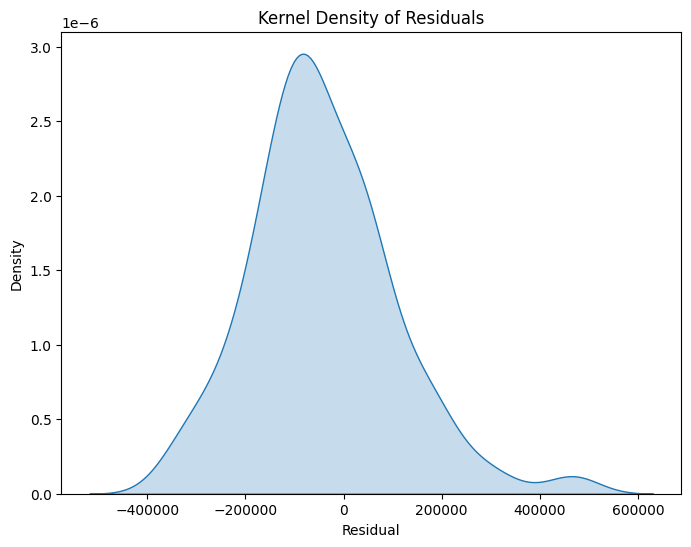

In [46]:
# joint model predicted vs. true plot and residual plot

y_test_pred = y_test_pred_joint
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Predicted vs. True Price")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, shade=True)
plt.title("Kernel Density of Residuals")
plt.xlabel("Residual")
plt.show()

Yes, the predicted values and true values do roughly line up along the diagonal, and the residuals also look roughly bell shaped around zero. Overall, the model seems to have a solid fit with a high R² and reasonably distributed errors, but the high RMSE suggests that while the model explains much of the variance, there is still a lot of room for improvement in reducing prediction error.

Question 3: 

1. 

In [49]:
sbdata = pd.read_csv('USSeatBelts.csv')
print(sbdata.head())

   rownames state  year  miles  fatalities  seatbelt speed65 speed70 drinkage  \
0         1    AK  1983   3358    0.044669       NaN      no      no      yes   
1         2    AK  1984   3589    0.037336       NaN      no      no      yes   
2         3    AK  1985   3840    0.033073       NaN      no      no      yes   
3         4    AK  1986   4008    0.025200       NaN      no      no      yes   
4         5    AK  1987   3900    0.019487       NaN      no      no      yes   

  alcohol  income        age enforce  
0      no   17973  28.234966      no  
1      no   18093  28.343542      no  
2      no   18925  28.372816      no  
3      no   18466  28.396652      no  
4      no   18021  28.453251      no  


2. 

In [51]:
# Drop rows with missing values
sbdata = sbdata.dropna()

# Define the yes/no columns using the standardized column names
yesno_cols = ['seatbelt', 'speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']

# Convert yes/no categorical columns to binary numeric (yes = 1, no = 0)
for col in yesno_cols:
    sbdata[col] = sbdata[col].fillna('no')  # fill missing with 'no'
    sbdata[col] = sbdata[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Check conversion
print(sbdata[yesno_cols].head())


    seatbelt  speed65  speed70  drinkage  alcohol  enforce
7          0        0        0         1        0        0
8          0        0        0         1        0        0
9          0        1        0         1        0        0
10         0        1        0         1        0        0
11         0        1        0         1        0        0


In [52]:
# Summary statistics for fatalities
print("Fatalities Summary:")
print(sbdata['fatalities'].describe())

Fatalities Summary:
count    556.000000
mean       0.019769
std        0.005030
min        0.008327
25%        0.016217
50%        0.019215
75%        0.022647
max        0.035649
Name: fatalities, dtype: float64


/tmp/ipykernel_39465/1222117104.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sbdata['fatalities'], shade=True)


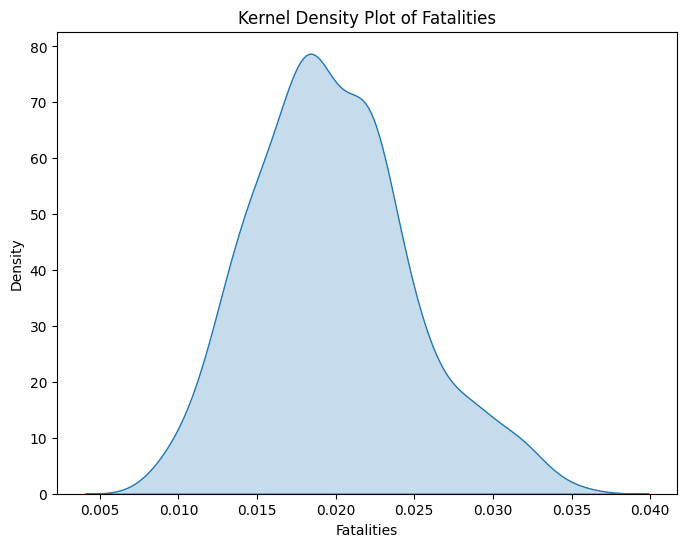

In [53]:
# Kernel density plot for fatalities
plt.figure(figsize=(8,6))
sns.kdeplot(sbdata['fatalities'], shade=True)
plt.title("Kernel Density Plot of Fatalities")
plt.xlabel("Fatalities")
plt.show()

In [54]:
# Group by state and summarize fatalities
state_summary = sbdata.groupby('state')['fatalities'].describe()
print("Fatalities Summary by State:")
print(state_summary)

Fatalities Summary by State:
       count      mean       std       min       25%       50%       75%  \
state                                                                      
AK       8.0  0.023350  0.004369  0.017552  0.020282  0.022865  0.025868   
AL      14.0  0.025121  0.003153  0.022004  0.022286  0.025188  0.026354   
AR      10.0  0.026595  0.003979  0.022091  0.023830  0.024943  0.028490   
AZ       8.0  0.023287  0.001672  0.020460  0.022779  0.023338  0.023825   
CA      13.0  0.018793  0.004146  0.012913  0.015562  0.018172  0.022320   
CO       8.0  0.017977  0.001302  0.016240  0.017082  0.017716  0.018692   
CT       8.0  0.011969  0.001194  0.011018  0.011274  0.011532  0.012071   
DC       8.0  0.017042  0.002159  0.014037  0.015789  0.017389  0.018450   
DE       8.0  0.017194  0.002326  0.015132  0.015751  0.016027  0.018473   
FL      13.0  0.025271  0.004509  0.020782  0.021704  0.022027  0.029225   
GA      11.0  0.019907  0.003679  0.016880  0.017316  0.017

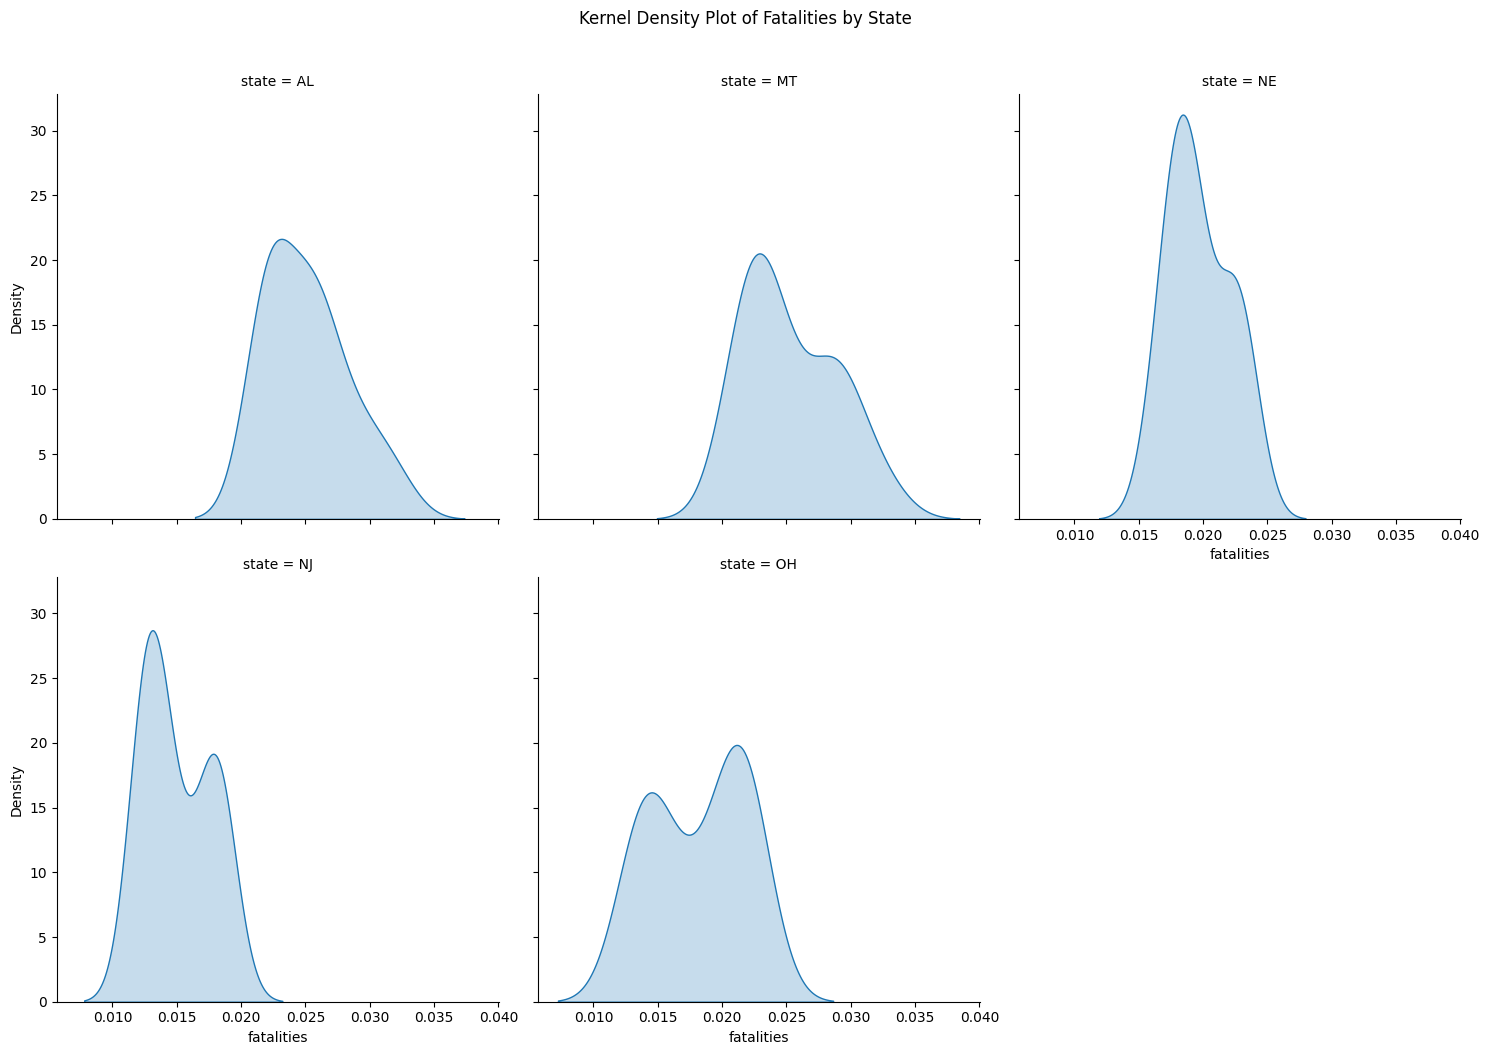

In [55]:
top_states = sbdata['state'].value_counts().head(5).index
sns.displot(data=sbdata[sbdata['state'].isin(top_states)], x="fatalities", col="state", col_wrap=3, kind="kde", fill=True)
plt.suptitle('Kernel Density Plot of Fatalities by State', y=1.05)
plt.show()

3 and 4:

In [62]:
# 80/20 split
train, test = train_test_split(sbdata, test_size=0.2, random_state=42)

# build models, fatalities as target var
y_train = train['fatalities']
y_test = test['fatalities']

# numeric only 
numeric_vars = ['year', 'miles', 'income', 'age']
X_train_num = train[numeric_vars]
X_test_num = test[numeric_vars]

num_model = LinearRegression()
num_model.fit(X_train_num, y_train)
y_train_pred_num = num_model.predict(X_train_num)
y_test_pred_num = num_model.predict(X_test_num)

rmse_test_num = np.sqrt(mean_squared_error(y_test, y_test_pred_num))

print("\nNumeric-Only Model:")
print("Test RMSE: {:.3f}".format(rmse_test_num))

# categorical only
X_train_cat = train[yesno_cols]
X_test_cat = test[yesno_cols]

cat_model = LinearRegression()
cat_model.fit(X_train_cat, y_train)
y_train_pred_cat = cat_model.predict(X_train_cat)
y_test_pred_cat = cat_model.predict(X_test_cat)

rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))

print("\nCategorical-Only Model:")
print("Test RMSE: {:.3f}".format(rmse_test_cat))

# joint model
X_train_joint = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_joint = pd.concat([X_test_num, X_test_cat], axis=1)

joint_model = LinearRegression()
joint_model.fit(X_train_joint, y_train)
y_train_pred_joint = joint_model.predict(X_train_joint)
y_test_pred_joint = joint_model.predict(X_test_joint)

rmse_test_joint = np.sqrt(mean_squared_error(y_test, y_test_pred_joint))

print("\nJoint Model (Numeric + Categorical):")
print("Test RMSE: {:.3f}".format(rmse_test_joint))



Numeric-Only Model:
Test RMSE: 0.004

Categorical-Only Model:
Test RMSE: 0.005

Joint Model (Numeric + Categorical):
Test RMSE: 0.004


5. Both the numeric-only and joint models had the lowest Test RMSE of 0.004, which shows that they performed best in terms of prediction accuracy. This suggests that the numeric features carry the most predictive information, and the inclusion of categorical variables does not add substantial predictive power beyond what is already provided by the numeric data. However, the categorical-only model was not much different, which could be an indicator of a simple model or redundant information in the dataset. 

6. The fact that all of the models give very similar prediction errors revealed that the predictive power of the target variable in our data might be captured well by either set of variables. However, it's important not to take these results at face value. In real-world data analysis, context matters, and understanding why certain features perform similarly or why one type of predictor doesn't add extra value requires deeper insight into the variables and data quality. This analysis taught me to always consider the broader picture, examine the data prep/cleaning process, and validate that our models make sense when evaluating the performance metrics.














